#### DBSCAN

- 데이터의 공간 다룸
- 전체 공간에서 데이터가 가장 밀집된 영역 찾음
- 밀집 영역(클러스터링), 클러스터 외부 영역으로 구분
- 밀집 정도 파악 하기 위해 데이터 포인트 간 거리 측정
- 데이터 압축 >> 거리 함수 선정 >> 군집분석(밀도_density)
- 이웃벡터 : 한 데이터로부터 반경 epsilon 원 안에 포함된 데이터 벡터(포인트)
- 핵심벡터(core point) : n개 이상의 이웃벡터를 갖는 데이터 벡터
- 직접 접근 가능 : 핵심 벡터 p와 이웃벡터 q와의 관계 (p --> q)
- 접근 가능 p1 --> p2, p2 --> q
- 군집 : 한 핵심 벡터 p 에 대한 접근 가능한 모든 벡터들의 집합

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [2]:
pd.read_csv('./data/wholesale.csv')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
data = pd.read_csv('./data/wholesale.csv')

In [4]:
data, data.shape

(     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
 0          2       3  12669   9656     7561     214              2674   
 1          2       3   7057   9810     9568    1762              3293   
 2          2       3   6353   8808     7684    2405              3516   
 3          1       3  13265   1196     4221    6404               507   
 4          2       3  22615   5410     7198    3915              1777   
 ..       ...     ...    ...    ...      ...     ...               ...   
 435        1       3  29703  12051    16027   13135               182   
 436        1       3  39228   1431      764    4510                93   
 437        2       3  14531  15488    30243     437             14841   
 438        1       3  10290   1981     2232    1038               168   
 439        1       3   2787   1698     2510      65               477   
 
      Delicassen  
 0          1338  
 1          1776  
 2          7844  
 3          1788  
 4          518

In [5]:
# 차원축소(PCA) (구매형태 분석 >> 비지도학습)
# 그래프가 2차원 : 8 features

pca = PCA(n_components=2)
pca.fit_transform(data)

array([[ 6.50022120e+02,  1.58551911e+03],
       [-4.42680498e+03,  4.04245152e+03],
       [-4.84199871e+03,  2.57876219e+03],
       [ 9.90346444e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972579e+03],
       [-2.76596159e+03, -9.59870712e+02],
       [-7.15550892e+02, -2.01300225e+03],
       [-4.47458367e+03,  1.42949698e+03],
       [-6.71209539e+03, -2.20590917e+03],
       [-4.82363437e+03,  1.34805592e+04],
       [-7.97482899e+03,  5.71121893e+03],
       [ 3.63937822e+01, -6.03789639e+03],
       [ 1.99402020e+04,  4.59128651e+03],
       [ 9.39669557e+03,  5.91315706e+03],
       [ 1.26603704e+04,  4.54194546e+03],
       [-2.99772589e+03, -6.09387931e+03],
       [-1.05895236e+04,  6.58421595e+03],
       [-6.36709517e+03, -3.68071268e+03],
       [ 6.62382533e+03,  1.25471955e+03],
       [-4.86153157e+03, -2.25592277e+02],
       [ 4.79424416e+03, -3.98879934e+03],
       [-7.24486683e+03, -7.34772327e+03],
       [ 1.92992657e+04, -6.93681067e+03],
       [ 1.

In [6]:
result = pca.fit_transform(data)

In [7]:
# 정규화

stdscaler = StandardScaler().fit(result)
result = stdscaler.transform(result)

In [8]:
result, result.shape

#  총 440개의 데이터 셋에서 8 feature에서 2 feature로 축소 >> 차원 축소

(array([[ 5.06623851e-02,  1.31615053e-01],
        [-3.45022873e-01,  3.35566736e-01],
        [-3.77382855e-01,  2.14064858e-01],
        [ 7.71870856e-02, -5.21291101e-01],
        [ 8.30678865e-01, -1.79280353e-01],
        [-2.15577605e-01, -7.96795411e-02],
        [-5.57696635e-02, -1.67100729e-01],
        [-3.48746718e-01,  1.18663547e-01],
        [-5.23137216e-01, -1.83114067e-01],
        [-3.75951548e-01,  1.11903068e+00],
        [-6.21554014e-01,  4.74092290e-01],
        [ 2.83651241e-03, -5.01210014e-01],
        [ 1.55412895e+00,  3.81125914e-01],
        [ 7.32373554e-01,  4.90855315e-01],
        [ 9.86742671e-01,  3.77030078e-01],
        [-2.33641193e-01, -5.05857196e-01],
        [-8.25341946e-01,  5.46560384e-01],
        [-4.96248078e-01, -3.05538542e-01],
        [ 5.16257493e-01,  1.04155150e-01],
        [-3.78905236e-01, -1.87265732e-02],
        [ 3.73660891e-01, -3.31113031e-01],
        [-5.64661144e-01, -6.09939662e-01],
        [ 1.50417471e+00, -5.758

Populating the interactive namespace from numpy and matplotlib


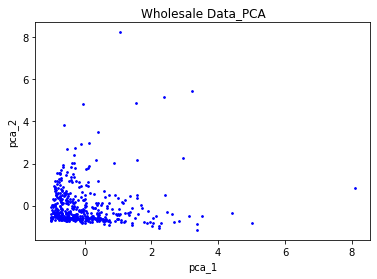

In [9]:
import matplotlib.pyplot as plt
%pylab inline

plt.scatter(result[:,0], result[:,1], s=3, c='b')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('Wholesale Data_PCA')
plt.savefig('Wholesale Data_PCA', format='PNG')
plt.show()

# 결과해석
# 군집 1개, 나머지 noise

#### DBSCAN(밀도기반 군집분석)

In [10]:
DBSCAN(eps=.5, min_samples=15).fit(result)

# eps: 반경, min_samples : core data 정의

DBSCAN(min_samples=15)

In [11]:
dbsc = DBSCAN(eps=.5, min_samples=15).fit(result)
dbsc.labels_  # 결과값 

# 결과 해석
# 군집이 1개, (0: 군집, -1:noise)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [12]:
labels = dbsc.labels_

In [15]:
# 핵심 포인트(core points)

core_sample = np.zeros_like(labels, dtype=bool)

In [16]:
core_sample[dbsc.core_sample_indices_]=True

In [17]:
core_sample

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,

In [18]:
np.unique(labels)

array([-1,  0], dtype=int64)

In [20]:
# 색상 테이블 만드는 작업

unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

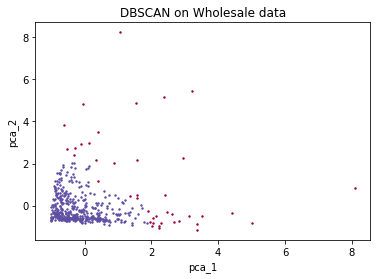

In [22]:
# 군집과 노이즈를 색으로 구분

for (label, color) in zip(unique_labels, colors):
    class_mamber_mask = (labels == label)
    xy = result[class_mamber_mask & core_sample] 
    plt.scatter(xy[:,0], xy[:,1], color=color, s=2)
    
    xy2 = result[class_mamber_mask & ~core_sample] 
    plt.scatter(xy2[:,0], xy2[:,1], color=color, s=2)
    
plt.title('DBSCAN on Wholesale data')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.savefig('dbscan_on Wholesale data', format='PNG')